# Importing Package

In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

In [364]:
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [365]:
pd.options.display.max_columns=None
data=pd.read_csv("C:\\Users\\shiva\\Desktop\\Pranav\\Logistic Regression Project-VIVA\\LeadScoringCaseStudy\\LeadScoringAssignment\\Leads.csv")

In [366]:
data.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


# Data Study

In [367]:
data.shape

(9240, 37)

###### Observation: There are 9240 rows and 37 columns 

In [368]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [369]:
data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,889c23c8-84d0-4936-97ad-7b438dc2e2d7,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


###### Observation:  The mean is more than median (50%) in the columns like Total Visits, Total Time,Page Visit,Asymmetrique Activity and Profile Score. So they are having right skewed distribution. And for the columns like Lead Profile and Specialization, the top frequent value is select which is actually NULL value. For the column Magazine , Receive More Updates About Our Course , Update me on Supply Chain Content , Get updates on DM Content and I agree to pay the amount through cheque, there is only one unique value. Hence there is no much of a variance.

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### Observation: 
###### There are null values in some columns as the total number of non null columns is less than the total number of records
###### We have three kind of data types: int, float and object

# EDA

### Dropping City and Country Column as it wont be of any use to decide the output

In [371]:
data.drop(['Country','City'],axis=1,inplace=True)

### Finding the frequency of the values in all categorical columns

In [372]:
for column in data:
    print(data[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

###### Observation:  The columns Do Not Call has only 2 values of Yes and rest are No. So it can be removed. The columns Lead Profile and How did you hear about X Education has more values of the value Select.Hence it can be removed too. Most of the records in the column What matters most to you in choosing a course is Better Career Prospects . hence that column also can be removed.For the columns Search,NewsPaperArticle,Newspaper,X Education Forums,Digital Advertisement, Through Recommendations has most values as No. Hence they can also be removed.The columns Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,Receive More Updates About Our Courses and Magazine has all values as No. Hence 0 variation. Therefore they can be removed. 

### Removing the above mentioned columns

In [373]:
data.drop(['Do Not Call','Lead Profile','How did you hear about X Education','What matters most to you in choosing a course','Search','Newspaper Article','Newspaper','X Education Forums','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine'],axis=1,inplace=True)

### Null Values Check

In [374]:
data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
Tags                                      3353
Lead Quality                              4767
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

###### Observation: There are null values in some of the categorical columns as well as numerical columns. Also some columns have huge number of null values so it can be dropped off

### Dropping NA records in the columns which very large count of NA 

In [375]:
for col in data.columns:
    if data[col].isnull().sum() > 3000:
        data.drop(col, 1, inplace=True)

In [376]:
data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [377]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [378]:
data=data[~pd.isnull(data['Lead Source'])]
data=data[~pd.isnull(data['TotalVisits'])]
data=data[~pd.isnull(data['Page Views Per Visit'])]
data=data[~pd.isnull(data['Last Activity'])]
data=data[~pd.isnull(data['What is your current occupation'])]
data=data[~pd.isnull(data['Specialization'])]
data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

###### Observation: Now we are having the data which has no null values

In [1]:
print(len(data.index)/9240)

NameError: name 'data' is not defined

###### Observation: We have now 68% of data after handling the null values

### Removing Prospect ID and Lead Number columns as they are identifier columns

In [380]:
data.drop(['Prospect ID','Lead Number'],1,inplace=True)
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened


### Univariate Analysis

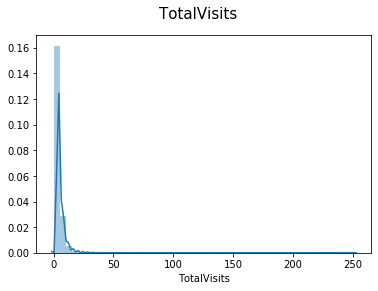

21.613824965977148


In [381]:
fig = plt.figure()
sns.distplot(data['TotalVisits'])
fig.suptitle('TotalVisits', fontsize = 15)                  # Plot heading 
#plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

print(data['TotalVisits'].skew())

###### Observation:The distribution of TotalVisits is highly rightskewed.

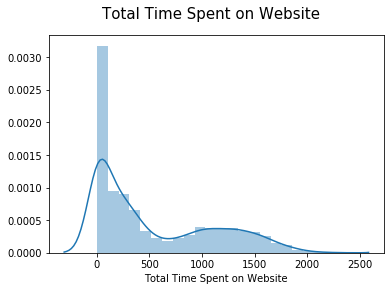

0.7966757726700819


In [382]:
fig = plt.figure()
sns.distplot(data['Total Time Spent on Website'])
fig.suptitle('Total Time Spent on Website', fontsize = 15)                  # Plot heading 
#plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

print(data['Total Time Spent on Website'].skew())

###### Observation:The distribution of Total Time Spent on Website is also rightskewed.

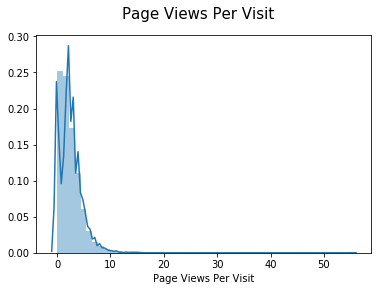

3.320000802869564


In [383]:
fig = plt.figure()
sns.distplot(data['Page Views Per Visit'])
fig.suptitle('Page Views Per Visit', fontsize = 15)                  # Plot heading 
#plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

print(data['Page Views Per Visit'].skew())

###### Observation:The distribution of Page Views Per Visit is highly rightskewed.

### Bivariate Analysis

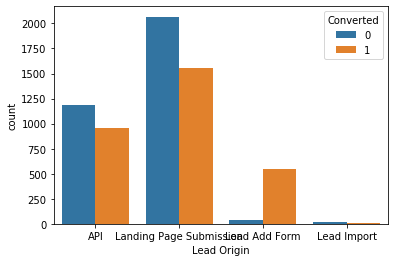

In [384]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
plt.show()

###### Observation:API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.Lead Add Form has more than 90% conversion rate but count of lead are not very high.Lead Import are very less in count.

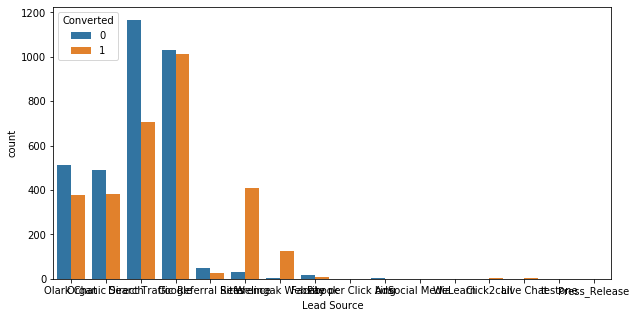

In [385]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
plt.show()

###### Observation:Google and Direct traffic generates maximum number of leads.Conversion Rate of reference leads and leads through welingak website is high.

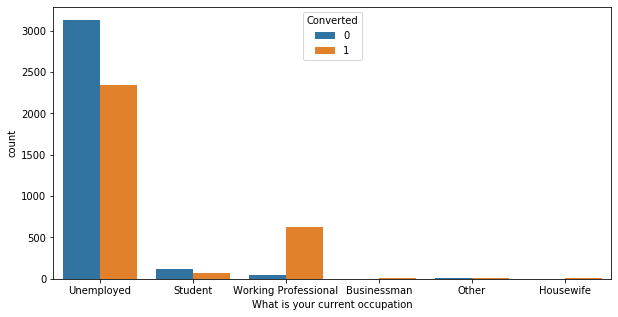

In [386]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
plt.show()

###### Observation:Most of the converted leads are unemployed 

### Checking Correlation

In [387]:
data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.005651,0.313338,-0.063362
TotalVisits,0.005651,1.000000,0.202551,0.489039
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000


### Pair Plot Visualization

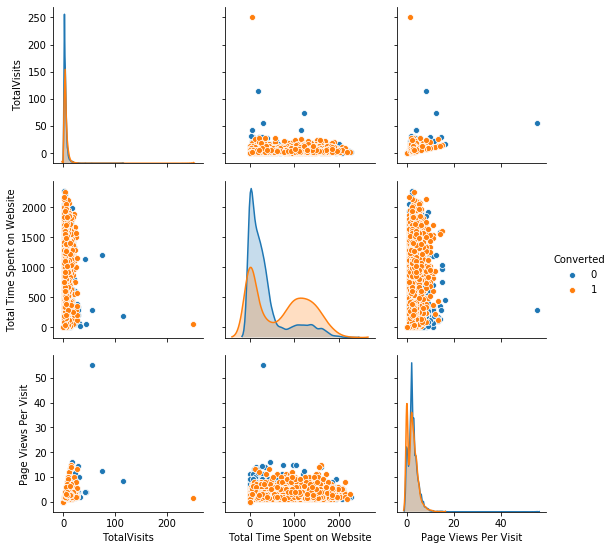

In [388]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data,diag_kind='kde',hue='Converted')

###### Observation: All three columns are clearly right skewed. Most of the converted leads have huge Total time spent on website value. 

In [389]:
pt=PowerTransformer()
temp=data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
temp=pd.DataFrame(pt.fit_transform(temp))
temp.columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']
temp.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


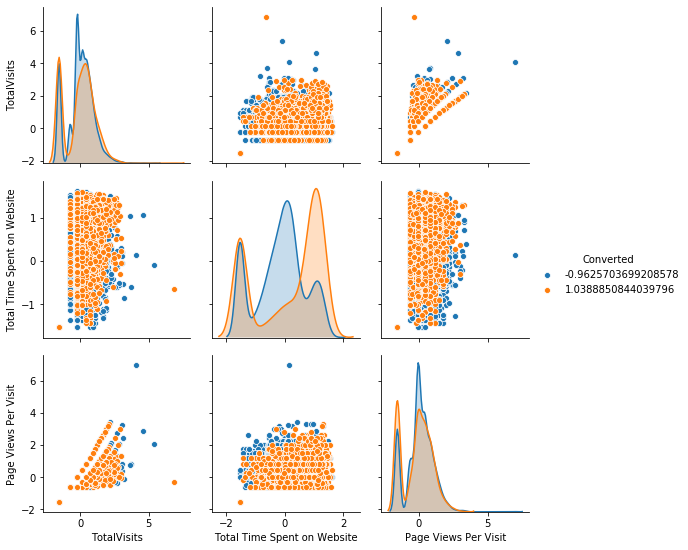

In [390]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(temp,diag_kind='kde',hue='Converted')
plt.show()

###### Observation: Now we can see that the values of skew is not near to 1 or -1. This clearly proves that the data is now normalized.Also the image shows the distribution of the columns which is not skewed

### Creating Dummy Variables

In [391]:
data['Do Not Email']=data['Do Not Email'].map({'Yes':1,'No':0})
data['A free copy of Mastering The Interview']=data['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [392]:
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)
data = pd.concat([data, dummy], axis=1)

In [393]:
dummy_spl = pd.get_dummies(data['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
data = pd.concat([data, dummy_spl], axis = 1)

In [394]:
data = data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [395]:
# Let's take a look at the dataset again

data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

In [396]:
# Import the required library

from sklearn.model_selection import train_test_split

In [397]:
# Put all the feature variables in X

X = data.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [398]:
# Put the target variable in y

y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [399]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [401]:
from sklearn.preprocessing import MinMaxScaler

In [402]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Correlation

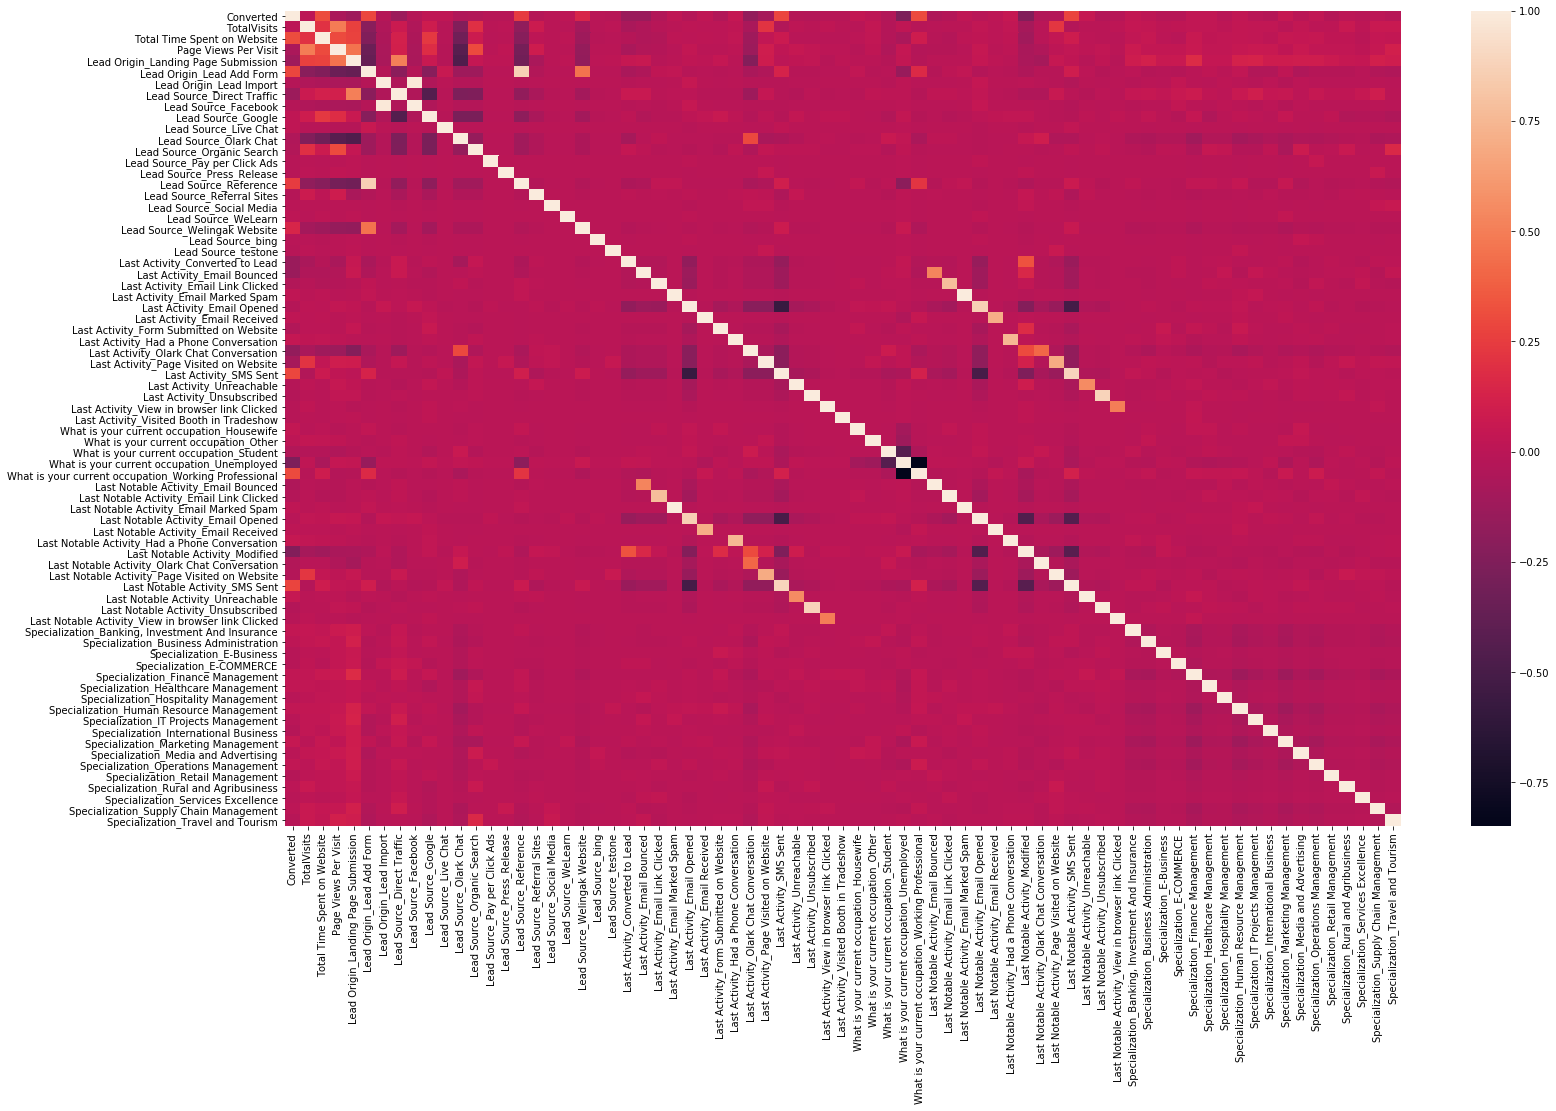

In [403]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(data.corr())

###### Observation: We can see there are very few columns which have a lil much of correlation. Almost all of the columns have not much of correlation which is a good sign

## Model Building

### Input and Output Assignment

In [404]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [405]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [406]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 26),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Acti

In [407]:
col = X_train.columns[rfe.support_]

In [408]:
X_train = X_train[col]

In [409]:
import statsmodels.api as sm

In [410]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.4
Date:                Mon, 23 Nov 2020   Deviance:                       4188.8
Time:                        23:30:48   Pearson chi2:                 4.92e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0318      0.610     -1.692      0.091      -2.227       0.163
TotalVisits                                              9.6750      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4599      0.184     24.201      0.000       4.099       4.821
Lead Origin_Lead Add Form                                2.9836      1.187      2.513      0.012       0.657       5.311
Lead Source_Olark Chat                                   1.4640      0.122     11.997      0.000       1.225       1.703
Lead Source_Reference                                    1.2246      1.210      1.012      0.312      -1.147       3.596
Lead Source_Welingak Website                             3.2963      1.555      2.120      0.034       0.249       6.343
Last Activity_Email Bounced                             -1.6916      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0754      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1088      0.082     13.585      0.000       0.949       1.269
What is your current occupation_Housewife               22.6894   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
What is your current occupation_Student                 -1.1259      0.639     -1.762      0.078      -2.379       0.127
What is your current occupation_Unemployed              -1.3232      0.604     -2.190      0.029      -2.507      -0.139
What is your current occupation_Working Professional     1.2999      0.633      2.055      0.040       0.060       2.540
Last Notable Activity_Had a Phone Conversation          23.2092   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.8181      0.807      3.491      0.000       1.236       4.400
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [411]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [412]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.18
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.61
12,What is your current occupation_Working Profes...,1.57


VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [413]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [414]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.8
Date:                Mon, 23 Nov 2020   Deviance:                       4189.7
Time:                        23:30:50   Pearson chi2:                 4.90e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0312      0.610     -1.692      0.091      -2.226       0.164
TotalVisits                                              9.6751      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4600      0.184     24.200      0.000       4.099       4.821
Lead Origin_Lead Add Form                                4.1703      0.258     16.139      0.000       3.664       4.677
Lead Source_Olark Chat                                   1.4640      0.122     11.996      0.000       1.225       1.703
Lead Source_Welingak Website                             2.1096      1.036      2.036      0.042       0.079       4.141
Last Activity_Email Bounced                             -1.6917      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0753      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1087      0.082     13.583      0.000       0.949       1.269
What is your current occupation_Housewife               22.6911   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1253      0.639     -1.761      0.078      -2.378       0.127
What is your current occupation_Unemployed              -1.3237      0.604     -2.191      0.028      -2.508      -0.140
What is your current occupation_Working Professional     1.3004      0.633      2.056      0.040       0.061       2.540
Last Notable Activity_Had a Phone Conversation          23.2095   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.8184      0.807      3.492      0.000       1.236       4.400
========================================================================================================================
"""

The variable `Lead Profile_Dual Specialization Student	` also needs to be dropped.

In [415]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.61
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [416]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [417]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.7
Date:                Mon, 23 Nov 2020   Deviance:                       4195.5
Time:                        23:30:51   Pearson chi2:                 4.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0332      0.609     -1.695      0.090      -2.228       0.161
TotalVisits                                              9.8018      2.787      3.517      0.000       4.340      15.263
Total Time Spent on Website                              4.4525      0.184     24.176      0.000       4.092       4.813
Lead Origin_Lead Add Form                                4.1704      0.258     16.139      0.000       3.664       4.677
Lead Source_Olark Chat                                   1.4640      0.122     11.995      0.000       1.225       1.703
Lead Source_Welingak Website                             2.1095      1.036      2.036      0.042       0.078       4.141
Last Activity_Email Bounced                             -1.6906      0.366     -4.623      0.000      -2.407      -0.974
Last Activity_Had a Phone Conversation                   2.8017      0.802      3.494      0.000       1.230       4.373
Last Activity_SMS Sent                                   1.1086      0.082     13.586      0.000       0.949       1.269
What is your current occupation_Housewife               21.6929   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1232      0.639     -1.758      0.079      -2.375       0.129
What is your current occupation_Unemployed              -1.3218      0.604     -2.189      0.029      -2.505      -0.138
What is your current occupation_Working Professional     1.3003      0.632      2.056      0.040       0.061       2.540
Last Notable Activity_Unreachable                        2.8174      0.807      3.491      0.000       1.235       4.399
========================================================================================================================
"""

Drop `What is your current occupation_Housewife`.

In [418]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [419]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.0
Date:                Mon, 23 Nov 2020   Deviance:                       4200.0
Time:                        23:30:52   Pearson chi2:                 4.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4561      0.558     -0.817      0.414      -1.551       0.638
TotalVisits                                              9.5775      2.773      3.454      0.001       4.143      15.012
Total Time Spent on Website                              4.4513      0.184     24.179      0.000       4.090       4.812
Lead Origin_Lead Add Form                                4.1675      0.258     16.136      0.000       3.661       4.674
Lead Source_Olark Chat                                   1.4586      0.122     11.966      0.000       1.220       1.698
Lead Source_Welingak Website                             2.1078      1.036      2.034      0.042       0.077       4.139
Last Activity_Email Bounced                             -1.6917      0.366     -4.626      0.000      -2.408      -0.975
Last Activity_Had a Phone Conversation                   2.8034      0.802      3.497      0.000       1.232       4.375
Last Activity_SMS Sent                                   1.1082      0.082     13.583      0.000       0.948       1.268
What is your current occupation_Student                 -1.6956      0.592     -2.863      0.004      -2.856      -0.535
What is your current occupation_Unemployed              -1.8940      0.554     -3.417      0.001      -2.980      -0.808
What is your current occupation_Working Professional     0.7277      0.585      1.244      0.214      -0.419       1.874
Last Notable Activity_Unreachable                        2.8147      0.807      3.486      0.000       1.232       4.397
========================================================================================================================
"""

Drop `What is your current occupation_Working Professional`.

In [420]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [421]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.7
Date:                Mon, 23 Nov 2020   Deviance:                       4201.5
Time:                        23:30:53   Pearson chi2:                 4.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2044      0.196      1.042      0.297      -0.180       0.589
TotalVisits                                    9.4577      2.766      3.419      0.001       4.037      14.879
Total Time Spent on Website                    4.4526      0.184     24.184      0.000       4.092       4.813
Lead Origin_Lead Add Form                      4.1672      0.258     16.137      0.000       3.661       4.673
Lead Source_Olark Chat                         1.4582      0.122     11.969      0.000       1.219       1.697
Lead Source_Welingak Website                   2.1066      1.036      2.033      0.042       0.076       4.138
Last Activity_Email Bounced                   -1.6834      0.365     -4.616      0.000      -2.398      -0.969
Last Activity_Had a Phone Conversation         2.8075      0.802      3.502      0.000       1.236       4.379
Last Activity_SMS Sent                         1.1117      0.081     13.644      0.000       0.952       1.271
What is your current occupation_Student       -2.3554      0.280     -8.420      0.000      -2.904      -1.807
What is your current occupation_Unemployed    -2.5542      0.186    -13.761      0.000      -2.918      -2.190
Last Notable Activity_Unreachable              2.8162      0.807      3.488      0.000       1.234       4.399
==============================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [422]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.81
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.52
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
8,What is your current occupation_Student,1.07
5,Last Activity_Email Bounced,1.04
6,Last Activity_Had a Phone Conversation,1.01


We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [423]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.277667
218     0.137924
4171    0.122293
4037    0.290762
3660    0.949265
207     0.188492
2044    0.175462
6411    0.948679
6498    0.064093
2085    0.980619
dtype: float64

In [424]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27766695, 0.1379242 , 0.12229282, 0.29076236, 0.94926508,
       0.18849228, 0.17546212, 0.94867887, 0.06409252, 0.98061944])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [425]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.277667
1,0,0.137924
2,1,0.122293
3,1,0.290762
4,1,0.949265


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [426]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.277667,0
1,0,0.137924,0
2,1,0.122293,0
3,1,0.290762,0
4,1,0.949265,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [427]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [428]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1927  385]
 [ 561 1588]]


In [429]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.787939923783905


In [430]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [431]:
# Calculate the sensitivity

TP/(TP+FN)

0.7389483480688692

In [432]:
# Calculate the specificity

TN/(TN+FP)

0.8334775086505191

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [433]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [434]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [435]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

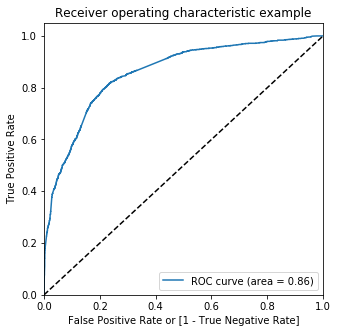

In [436]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [437]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1


In [438]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.513114  0.992089  0.067907
0.2   0.2  0.692221  0.947417  0.455017
0.3   0.3  0.766196  0.863658  0.675606
0.4   0.4  0.789733  0.803630  0.776817
0.5   0.5  0.787940  0.738948  0.833478
0.6   0.6  0.755660  0.622615  0.879325
0.7   0.7  0.732795  0.538855  0.913062
0.8   0.8  0.709482  0.447650  0.952855
0.9   0.9  0.642009  0.276408  0.981834


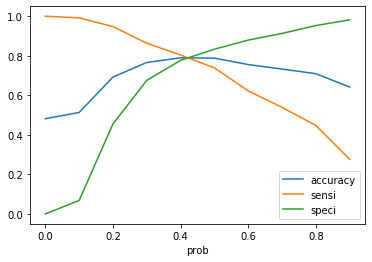

In [439]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [440]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1,1


In [441]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7901815736381977

In [442]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1830,  482],
       [ 454, 1695]], dtype=int64)

In [443]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [444]:
# Calculate Sensitivity

TP/(TP+FN) 79

0.7887389483480689

In [445]:
# Calculate Specificity

TN/(TN+FP)

0.7915224913494809

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [446]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [447]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [448]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [449]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,0,0,1,0,0,1,0,0,0


In [450]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [451]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [452]:
y_test_pred[:10]

4771    0.995862
6122    0.123821
9202    0.683205
6570    0.636989
2668    0.694922
4233    0.941270
3368    0.703722
9091    0.450195
5972    0.263949
3631    0.768897
dtype: float64

In [453]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [454]:
# Let's see the head

y_pred_1.head()

,0
4771,0.995862
6122,0.123821
9202,0.683205
6570,0.636989
2668,0.694922


In [455]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [456]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [457]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [458]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [459]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [460]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [461]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [462]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.995862,1
1,0,0.123821,0
2,0,0.683205,1
3,1,0.636989,1
4,1,0.694922,1


In [463]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7881799163179917

In [464]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[792, 204],
       [201, 715]], dtype=int64)

In [465]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [466]:
# Calculate sensitivity
TP / float(TP+FN)

0.7805676855895196

In [467]:
# Calculate specificity
TN / float(TN+FP)

0.7951807228915663

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [468]:
#Looking at the confusion matrix again

In [469]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1927,  385],
       [ 561, 1588]], dtype=int64)

##### Precision
TP / TP + FP

In [470]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8048656867714141

##### Recall
TP / TP + FN

In [471]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7389483480688692

### Precision and recall tradeoff

In [472]:
from sklearn.metrics import precision_recall_curve

In [473]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [474]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

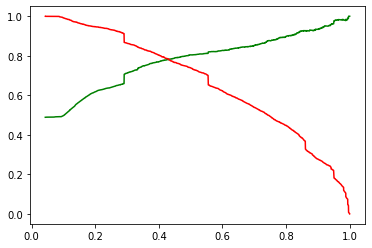

In [475]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [476]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1,1


In [477]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7881640887693342

In [478]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1855,  457],
       [ 488, 1661]], dtype=int64)

In [479]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [480]:
# Calculate Precision

TP/(TP+FP)

0.7842304060434372

In [481]:
# Calculate Recall

TP/(TP+FN)

0.7729176361098186

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [482]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [483]:
y_test_pred[:10]

4771    0.995862
6122    0.123821
9202    0.683205
6570    0.636989
2668    0.694922
4233    0.941270
3368    0.703722
9091    0.450195
5972    0.263949
3631    0.768897
dtype: float64

In [484]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [485]:
# Let's see the head

y_pred_1.head()

,0
4771,0.995862
6122,0.123821
9202,0.683205
6570,0.636989
2668,0.694922


In [486]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [487]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [488]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [489]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [490]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [491]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [492]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [493]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.995862,1
1,0,0.123821,0
2,0,0.683205,1
3,1,0.636989,1
4,1,0.694922,1


In [494]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7892259414225942

In [495]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[803, 193],
       [210, 706]], dtype=int64)

In [496]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [497]:
# Calculate Precision

TP/(TP+FP)

0.7853170189098999

In [498]:
# Calculate Recall

TP/(TP+FN)

0.7707423580786026